In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
dataset = pd.read_csv("SocialNetworkAds.csv","\t")
dataset

,User Id,Gender,Age,EstimatedSalary,Purchased
0,12343,Male,19,19000,0
1,12344,Male,35,20000,0
2,12345,Female,26,43000,0
3,12346,Female,27,76000,0
4,12347,Male,19,150000,1
5,12348,Female,27,33000,0
6,12349,Male,32,65000,0


In [7]:
x= dataset.iloc[:,[2,3]].values
y=dataset.iloc[:,4].values


In [8]:
x

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  76000],
       [    19, 150000],
       [    27,  33000],
       [    32,  65000]], dtype=int64)

In [9]:
y

array([0, 0, 0, 0, 1, 0, 0], dtype=int64)

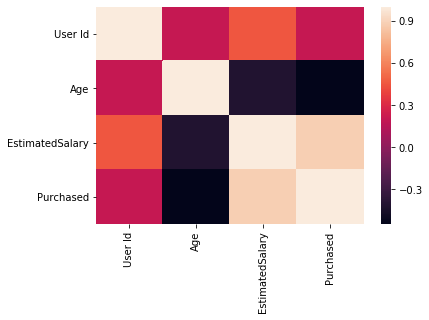

In [10]:
sns.heatmap(dataset.corr())

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [12]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [13]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)
    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 0], dtype=int64)

TypeError: 'tuple' object is not callable

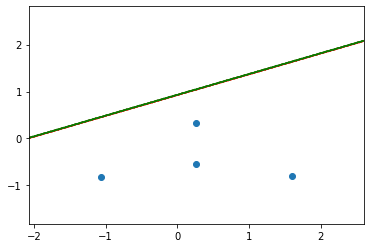

In [31]:
# visualising the training set results
from matplotlib.colors import ListedColormap
x_set,y_set = x_train,y_train
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop = x_set[:,0].max() + 1, step = 0.01), np.arange(start = x_set[:,1].min()-1,stop = x_set[:, 1].max()+1,step=0.01))
plt.contour(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape), alpha= 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0],x_set[y_set == j ,1])
    c= ListedColormap(('red','green')(i), label=j)
plt.title('Logistic Regression(Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
    

TypeError: 'tuple' object is not callable

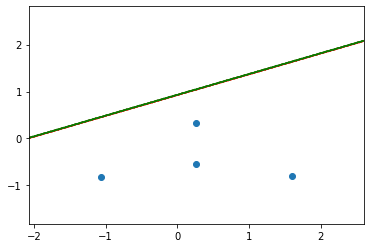

In [32]:
# visualising the test set results
from matplotlib.colors import ListedColormap
x_set,y_set = x_train,y_train
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop = x_set[:,0].max() + 1, step = 0.01), np.arange(start = x_set[:,1].min()-1,stop = x_set[:, 1].max()+1,step=0.01))
plt.contour(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape), alpha= 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0],x_set[y_set == j ,1])
    c= ListedColormap(('red','green')(i), label=j)
plt.title('Logistic Regression(Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
    

In [33]:
# confusion matrix evaluation
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm


array([[2]], dtype=int64)

In [ ]:
# if array contains higer no then accuracy is more.
# take a sum of diagonal devide by totl sum 0.89 means 90% accuracy we got.